In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import torch
import networkx as nx
from torch_geometric.utils import to_networkx

In [2]:
DSNAME = "MHEALTH"
PATH = f"../data/{DSNAME}/ensemble/processed/all_corr_matrices.pt"

### Load activity_graphs

In [3]:
if DSNAME == "UCIHAR":
    labels_vec = ["Walking", "Walking Up", "Walking Down", "Sitting", "Standing", "Laying"]
elif DSNAME == "PAMAP2":    
    labels_vec = ['Lying down', 'Sitting', 'Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walk', 'Walking Upstairs', 'Walking Downstairs', 'Vacuum Cleaning', 'Ironing', 'Rope Jumping']
if DSNAME == "MHEALTH":
    labels_vec = ['Standing', 'Sitting', 'Lying down', 'Walking', 'Climbing stairs', 'Waist bends forward', 'Arms up', 'Knees Bending', 'Cycling', 'Jogging', 'Running', 'Jumping']

labels_dict = {k:v for k,v in enumerate(labels_vec)}

In [4]:
def get_sensor_names(ds_name: str):
    sensor_labels = []
    if ds_name.lower() == "ucihar":
        sensor_labels = [
            "body_acc_x",
            "body_acc_y",
            "body_acc_z",
            "body_gyro_x",
            "body_gyro_y",
            "body_gyro_z",
            "total_acc_x",
            "total_acc_y",
            "total_acc_z"
        ]
        remove_list = [5]
    elif ds_name.lower() == "mhealth":
        sensor_labels = [
            'chest_Acc_X', 'chest_Acc_Y', 'chest_Acc_Z',
            'ankle_Acc_X', 'ankle_Acc_Y', 'ankle_Acc_Z',
            'ankle_Gyr_X', 'ankle_Gyr_Y', 'ankle_Gyr_Z',
            'ankle_Mag_X', 'ankle_Mag_Y', 'ankle_Mag_Z',
            'wrist_Acc_X', 'wrist_Acc_Y', 'wrist_Acc_Z',
            'wrist_Gyr_X', 'wrist_Gyr_Y', 'wrist_Gyr_Z',
            'wrist_Mag_X', 'wrist_Mag_Y', 'wrist_Mag_Z'
        ]
        remove_list = [11]
    elif ds_name.lower() == "pamap2":
        sensor_labels = [
            'hand_Acc_X', 'hand_Acc_Y', 'hand_Acc_Z',
            'hand_Gyr_X', 'hand_Gyr_Y', 'hand_Gyr_Z',
            'hand_Mag_X', 'hand_Mag_Y', 'hand_Mag_Z',
            'chest_Acc_X', 'chest_Acc_Y', 'chest_Acc_Z',
            'chest_Gyr_X', 'chest_Gyr_Y', 'chest_Gyr_Z',
            'chest_Mag_X', 'chest_Mag_Y', 'chest_Mag_Z',
            'ank_Acc_X', 'ank_Acc_Y', 'ank_Acc_Z',
            'ank_Gyr_X', 'ank_Gyr_Y', 'ank_Gyr_Z',
            'ank_Mag_X', 'ank_Mag_Y', 'ank_Mag_Z'
        ]
        remove_list = [9, 19, 20, 22]

    return sensor_labels

[]

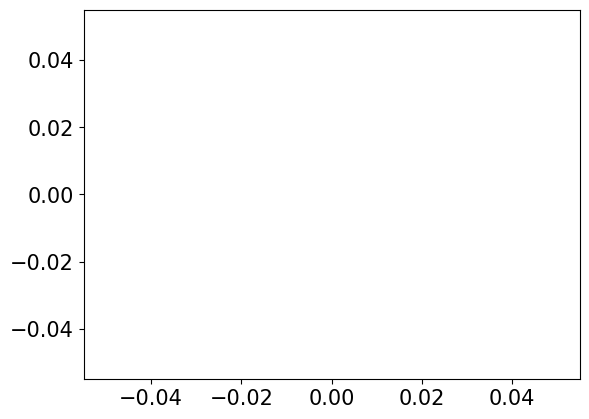

In [9]:
all_corr_mtrx = torch.load(PATH, map_location=torch.device("cpu"))
plt.rcParams.update(params)
plt.plot() 

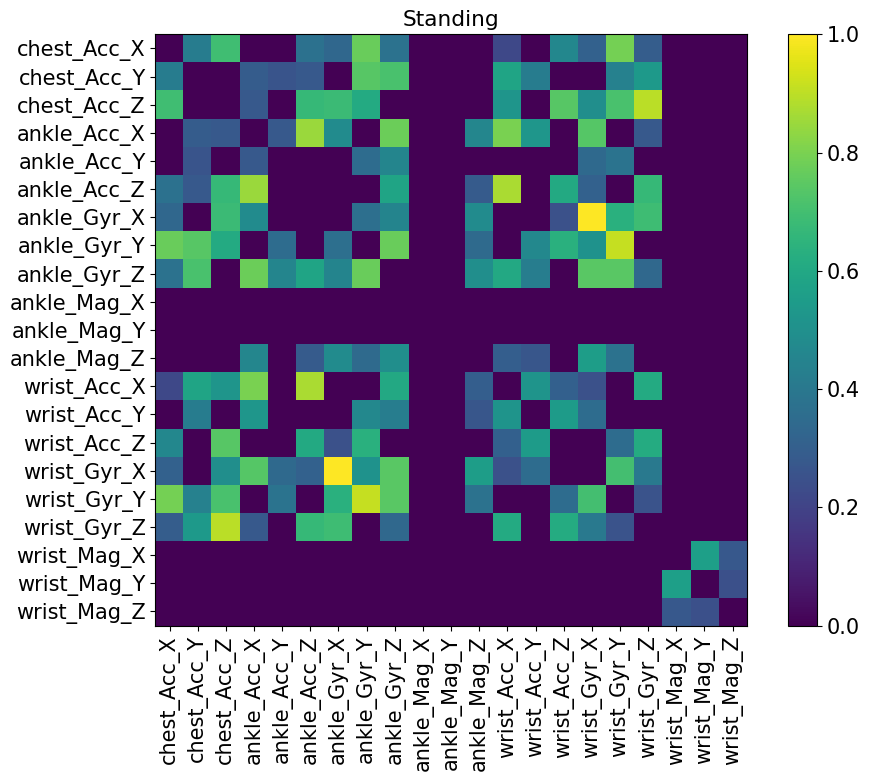

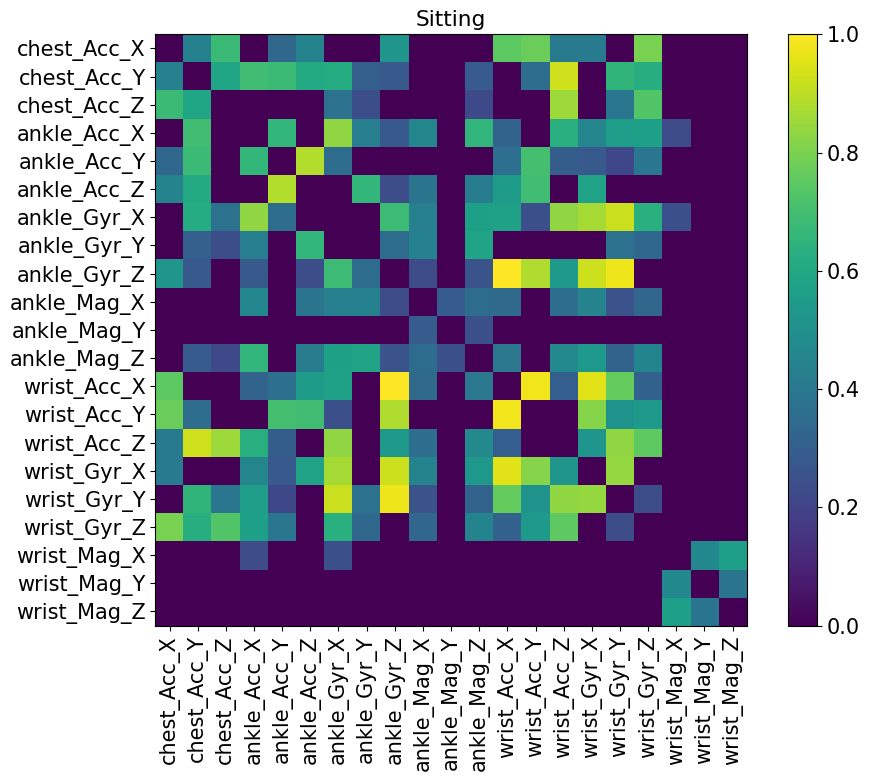

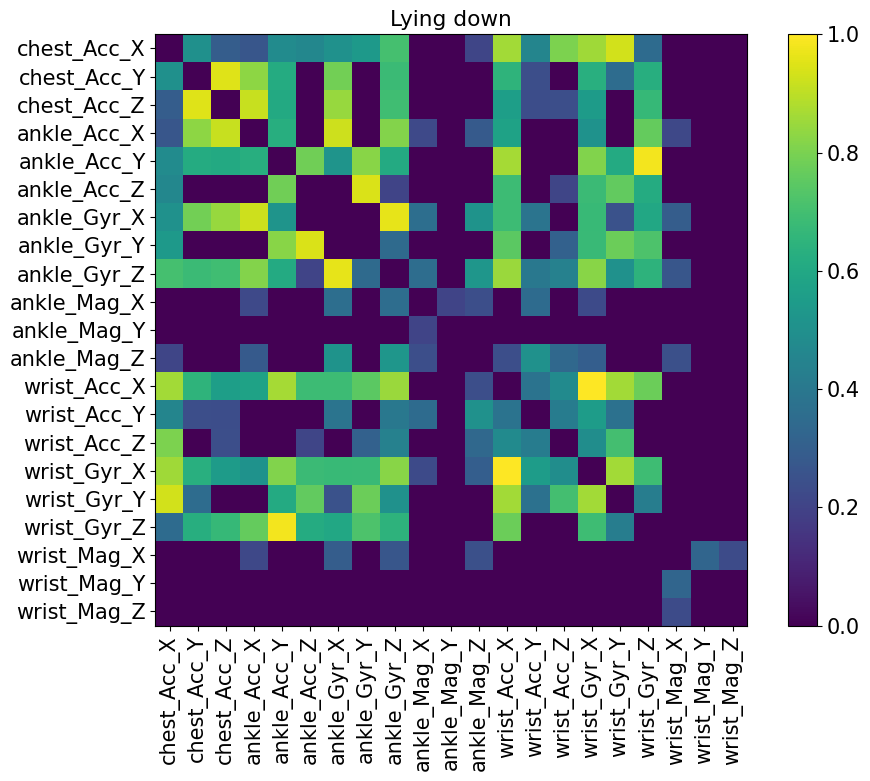

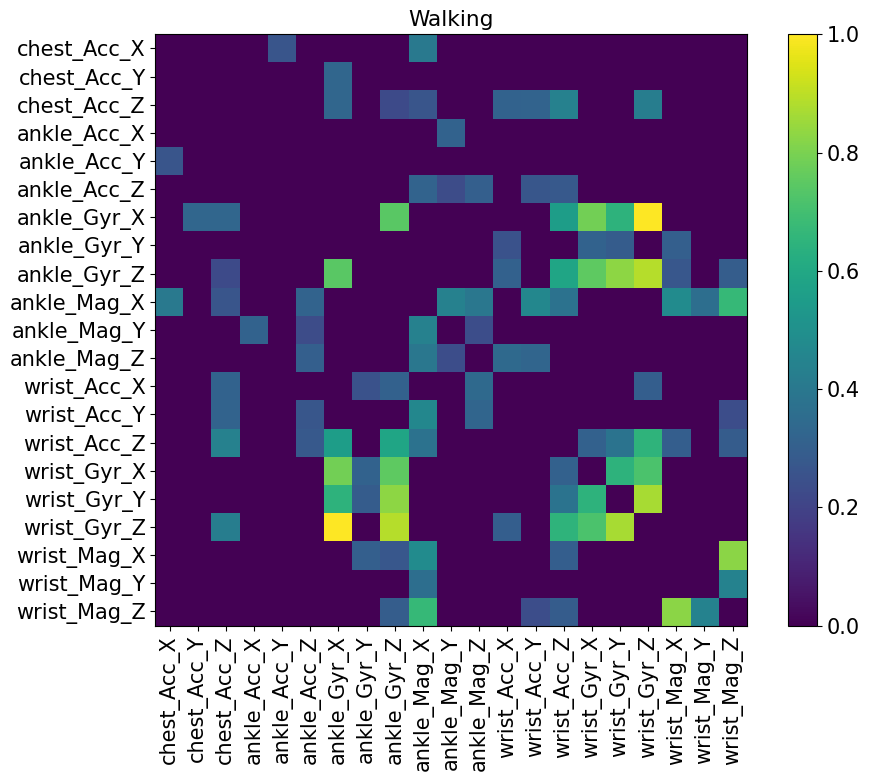

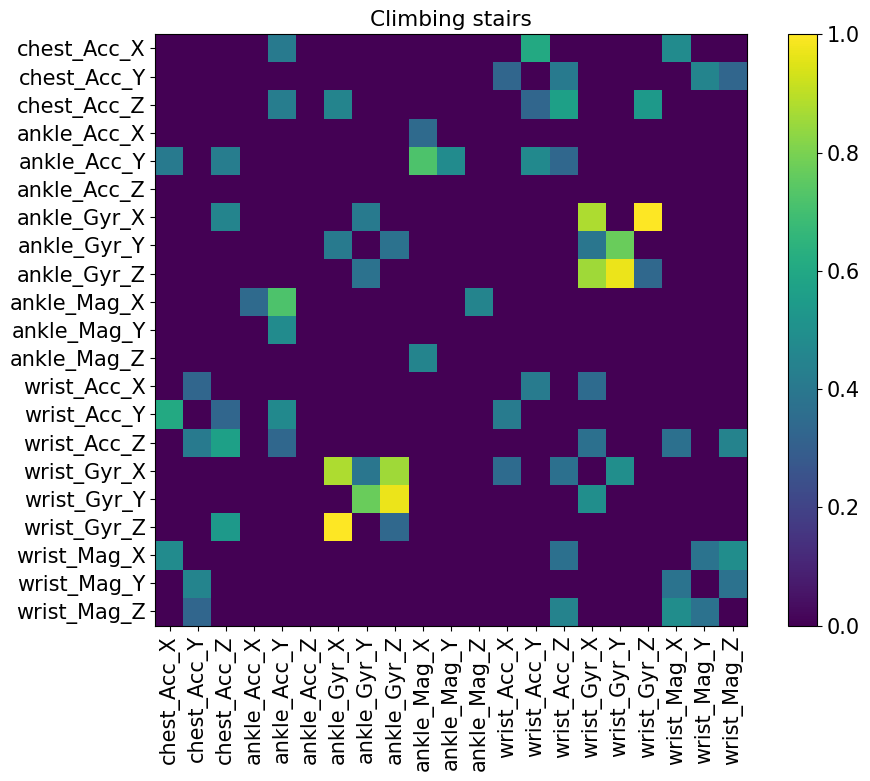

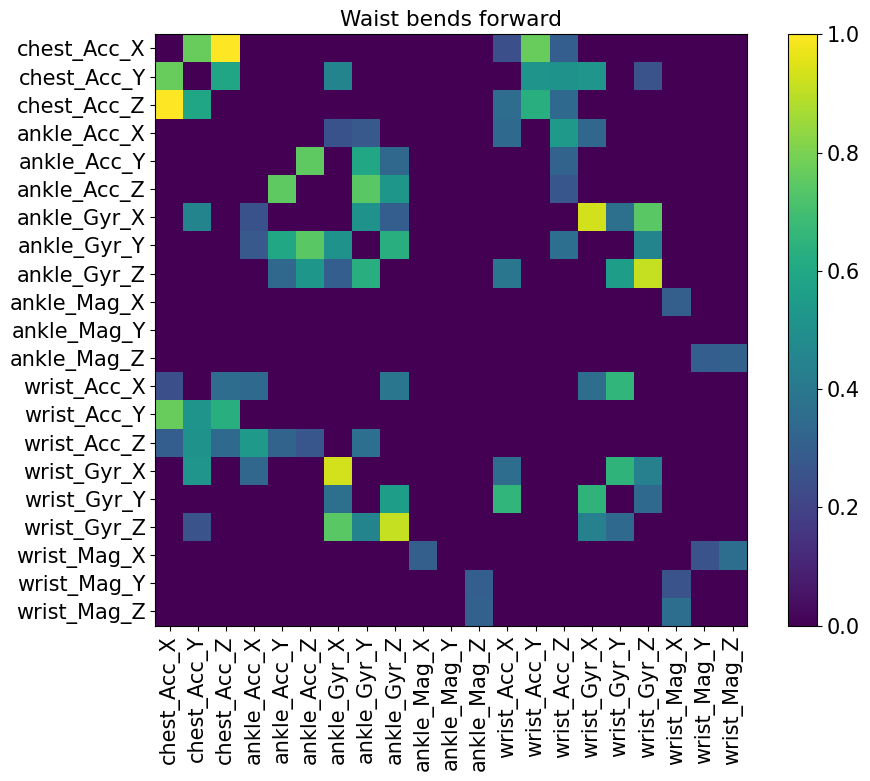

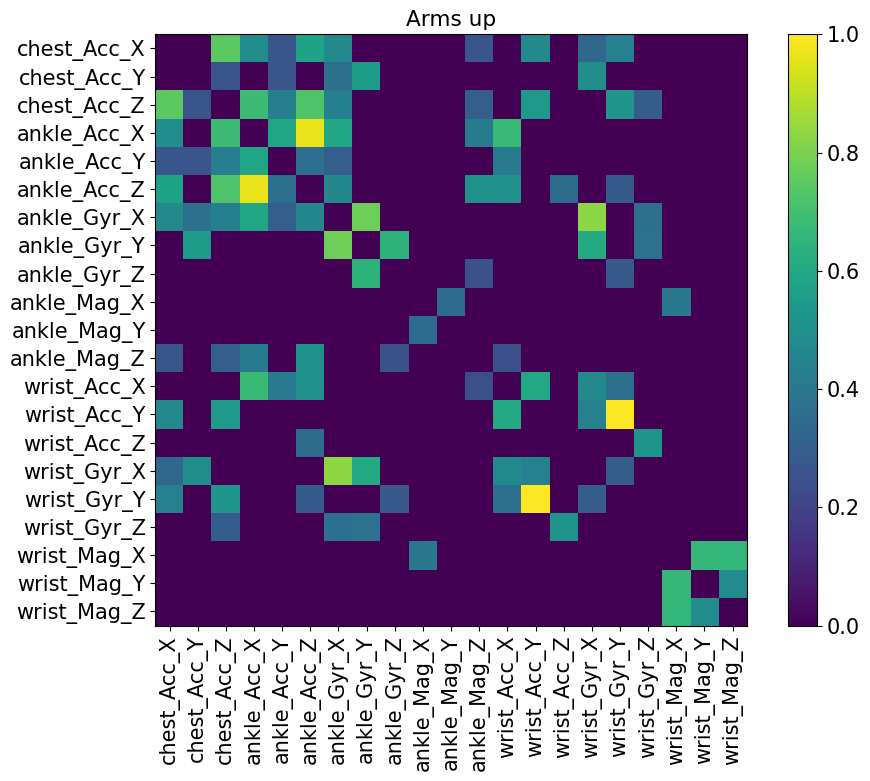

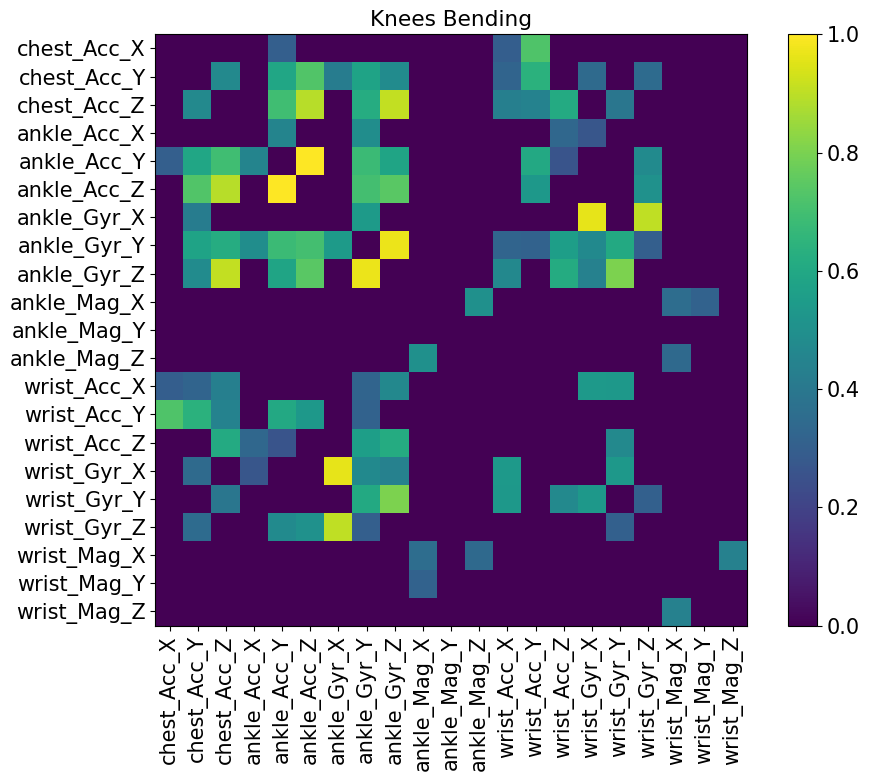

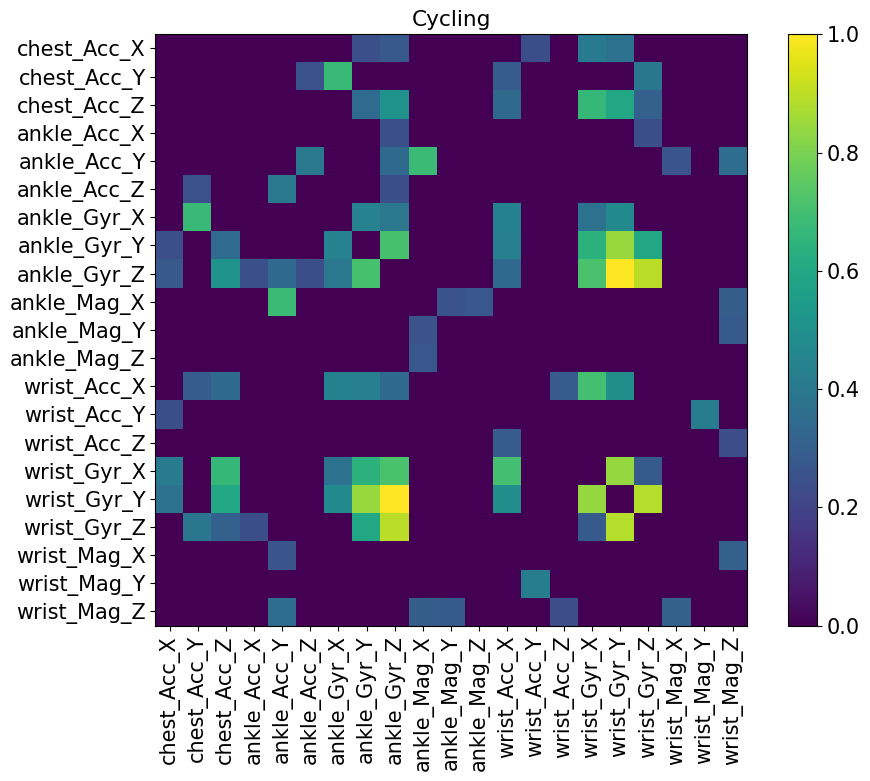

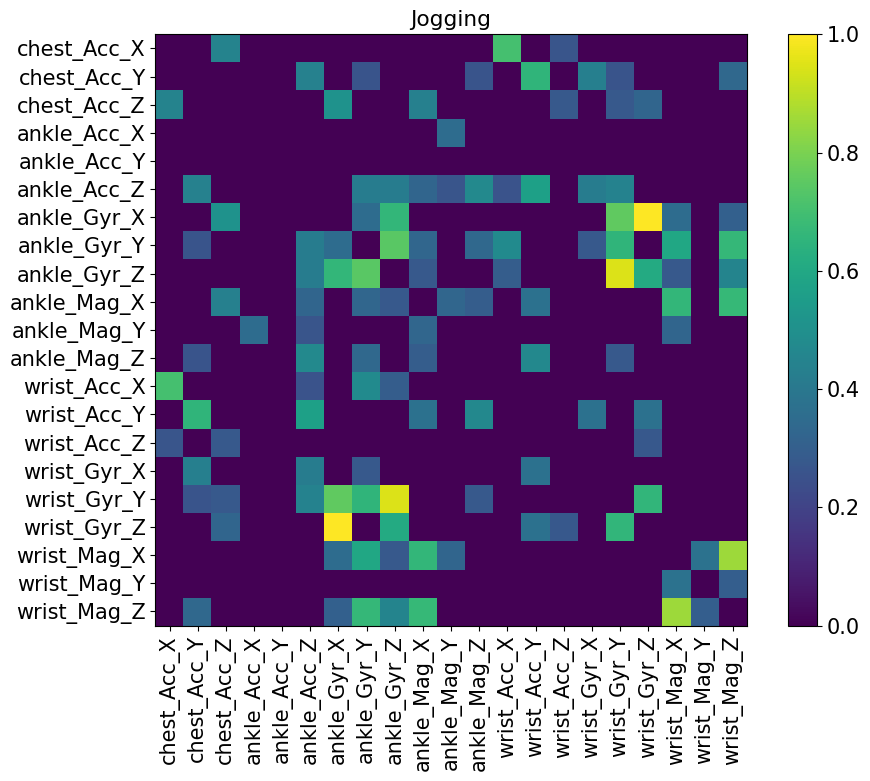

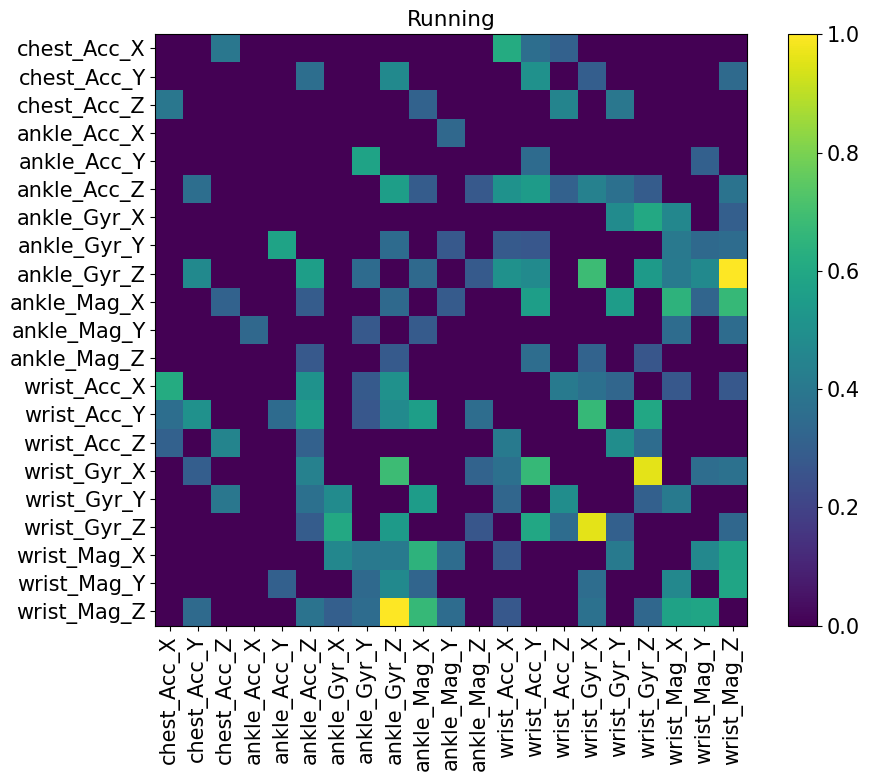

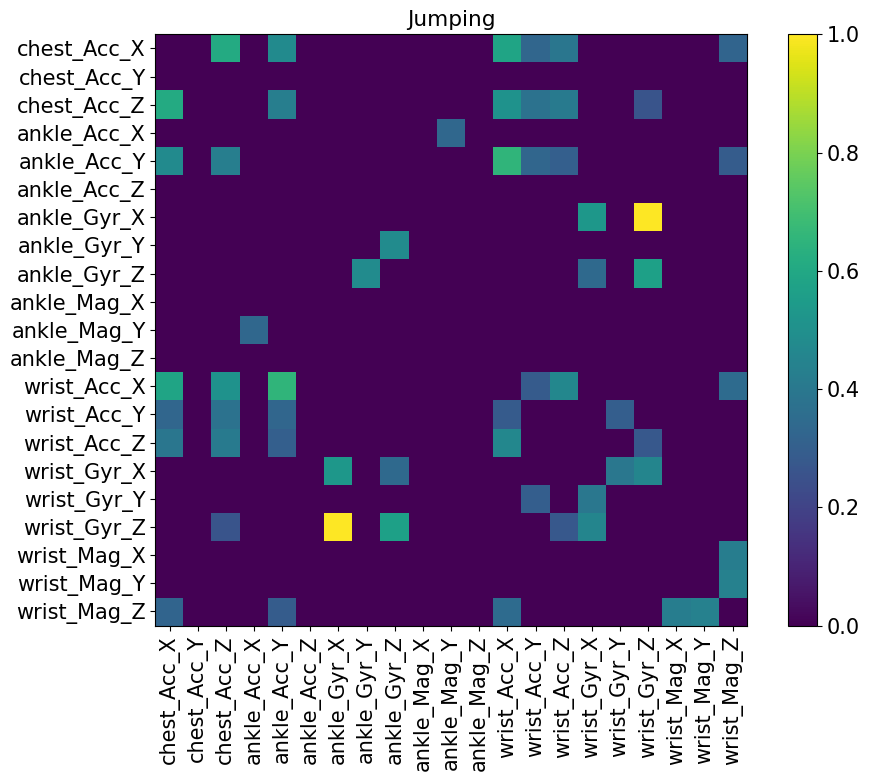

In [11]:
for k, v  in all_corr_mtrx.items():
    
    sensor_names = get_sensor_names(ds_name=DSNAME)
    size = len(sensor_names)
    ticks = np.arange(size)
 
    
    adj_mtrx = all_corr_mtrx[k]
    adj_mtrx = np.abs(adj_mtrx)
    adj_mtrx[np.diag_indices_from(adj_mtrx)] = 0 
    adj_mtrx[adj_mtrx<=0.2] = 0 
    
    adj_mtrx = adj_mtrx / adj_mtrx.max()

    fig = plt.figure(figsize=(10, 8))
    im = plt.imshow(adj_mtrx, cmap=plt.cm.viridis)
    fig.colorbar(im, orientation='vertical')

    plt.xticks(ticks, labels=[s for s in sensor_names], rotation=90, ha='center')
    plt.yticks(ticks, labels=[s for s in sensor_names])

    plt.title(labels_dict[k])
    fig.tight_layout()

    params = {'font.size': 13,
              'axes.labelsize': 16, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
    plt.rcParams.update(params)
    plt.savefig(f'../figs/adj_matrices/{DSNAME}/ensembles/{k:02d}_{labels_dict[k]}.svg', format="svg"),
    plt.show()

In [ ]:
def plot_adj_matrix(adj_mtrx, label, variant):

    adj_mtrx = np.abs(adj_mtrx)
    adj_mtrx[np.diag_indices_from(adj_mtrx)] = 0 
    
    # lines 70 - 74 fix a bug of matplotlib. It allows matplotlib to apply the font size settings.
    params = {'font.size': 13,
              'axes.labelsize': 16, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
    plt.rcParams.update(params)
    plt.plot()

    for idx in range(edges.shape[1]):
        adj_mtrx[(edges[0, idx], edges[1, idx])] = np.round(edge_weights[idx], 2)

    adj_mtrx = adj_mtrx / adj_mtrx.max()

    fig = plt.figure(figsize=(10, 8))
    im = plt.imshow(adj_mtrx, cmap=plt.cm.viridis)
    fig.colorbar(im, orientation='vertical')

    plt.xticks(ticks, labels=[v for k, v in sensor_names.items()], rotation=90, ha='center')
    plt.yticks(ticks, labels=[v for k, v in sensor_names.items()])

    plt.title(label)
    fig.tight_layout()

    params = {'font.size': 13,
              'axes.labelsize': 16, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
    plt.rcParams.update(params)
    plt.savefig(f'./figs/adj_matrices/{ds_name}/{variant}_{lbl_id:02d}_{label}.svg', format="svg"),
    plt.show()

In [ ]:
graphs_training = pickle.load(open(f"../data/{DSNAME}/graphs/graphs_training.pkl", 'rb'))
graphs_validation = pickle.load(open(f"../data/{DSNAME}/graphs/graphs_valid.pkl", 'rb'))
graphs_testing = pickle.load(open(f"../data/{DSNAME}/graphs/graphs_test.pkl", 'rb'))

In [ ]:
num_edges = []
num_nodes = []
mean_degree = []
for g in graphs_training:
    num_edges.append(len(g["edges"].keys()))
    num_nodes.append(len(g["nodes"].keys()))
    e_i = np.unique([e[0] for e in g["edges"].keys()])
    
    deg = []
    
    for i in e_i:
        e_j = [e[1] for e in g["edges"] if e[0] == i]
        deg.append(len(e_j))
    mean_degree.append(np.mean(deg))

In [ ]:
labels = []
for g in graphs_training+ graphs_validation+ graphs_testing:
    labels.append(g["label"])
    
lbl, count = np.unique(labels, return_counts=True)
for l,c in zip(lbl, count):
    print(f"{labels_vec[l]}: {c}")

In [ ]:
len(graphs_training), len(graphs_validation), len(graphs_testing), 

In [ ]:
int(np.mean(mean_degree))

In [ ]:
np.mean(num_nodes), np.max(num_nodes)

In [ ]:
int(np.mean(num_edges)), int(np.max(num_edges))

y = []
for g in graphs_training:
    y.append(g["label"])
    
lbl, cnts = np.unique(y, return_counts=True)
tot = np.sum(cnts)
for l, c in zip(lbl,cnts):
    print(f"{l}: {np.round(c/tot, 2)}")

y = []
for g in graphs_validation:
    y.append(g["label"])
    
lbl, cnts = np.unique(y, return_counts=True)
tot = np.sum(cnts)
for l, c in zip(lbl,cnts):
    print(f"{l}: {np.round(c/tot, 2)}")

### Plot adjancency matrix

In [ ]:
def plot_adj_matrix(graph):
    if DSNAME == "PAMAP2":
        adj_mtrx = np.zeros((36, 36))
        ticks = np.arange(36)
    elif DSNAME == "MHEALTH":
        adj_mtrx = np.zeros((21, 21))        
        ticks = np.arange(21)
    elif DSNAME == "UCIHAR":
        adj_mtrx = np.zeros((9, 9))
        ticks = np.arange(9)
        
    print(graph["label"])
    edges = graph["edges"]
    
#     for e in edges:
#         print(f"{e}: {edges[e]}")
    
    minv = np.min(list(edges.values()))
    maxv = np.max(list(edges.values()))
    for e, v in edges.items():
        adj_mtrx[(e[0],e[1])] = np.round(v,2) #np.round((v - minv)/(maxv - minv),2)
    
#     print(adj_mtrx)
        
        
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(adj_mtrx, cmap=plt.cm.hot_r)
    
#     for i in range(len(adj_mtrx)):
#         for j in range(len(adj_mtrx[0])):
#             str_value = str(np.round(adj_mtrx[i, j],2)) if np.round(adj_mtrx[i, j],2)>0 else ""
#             text = ax.text(j, i, str_value ,
#                            ha="center", va="center", color="w" if np.round(adj_mtrx[i, j],2)>=0.5 else "k" )  
    
    ax.set_xticks(ticks, labels=[str(t) for t in ticks])
    ax.set_yticks(ticks, labels=[str(t) for t in ticks])
    fig.tight_layout()

n_nodes = []
for g in graphs_training:
    n_nodes.append(len(g["nodes"]))
    
np.min(n_nodes), np.max(n_nodes), np.mean(n_nodes)

In [ ]:
plot_adj_matrix(graphs_training[525]), len(graphs_training[525]["edges"])

In [ ]:
plot_adj_matrix(graphs_training[523]), len(graphs_training[523]["edges"])

In [ ]:
plot_adj_matrix(graphs_training[1235]), len(graphs_training[1235]["edges"])

### Plot sample activity graphs

In [ ]:
def show_sample_graphs(data, n_samples, activity):
    random.seed(42)
    idx = random.sample(range(0, len(data)), int(len(data)*0.3))
    
    if n_samples == -1:
        idx = range(len(data))
        n_samples = np.inf

    samples = []
    
#     labels_dict = {
#         0: "Walking", 
#         1: "Walking Up", 
#         2: "Walking Down", 
#         3: "Sitting", 
#         4: "Standing", 
#         5: "Laying"
#     }

    labels_dict = {
        0: "lying",
        1: "sitting",
        2: "standing",
        3: "walking",
        4: "running",
        5: "cycling",
        6: "Nordic walking",
        7: "Walking Up",
        8: "Walking Down",
        9: "vacuum cleaning",
        10: "ironing",
        11: "rope jumping"
    }

    for g in np.asarray(data)[idx]:
        
        nodes = g["nodes"]


        if (g["label"] == activity).all() or activity == "all":
            if len(samples) < n_samples:
                samples.append(g)
            else:
                break
        else:
            continue
            
               
        networkX_graph = to_networkx(data, node_attrs=["x"], edge_attrs=["edge_attr"])
        
        print(len(g["edges"]))

        # adding nodes from list
        agraph.add_nodes_from([(key+1, {"emb": nodes[key]}) for key in nodes.keys()])

        # adding edges
        agraph.add_edges_from([(k[0]+1,k[1]+1) for k,v in list(g["edges"].items())])

        print(labels_dict[g["label"]])
        plt.figure(figsize=(10, 10)) 
        pos = nx.spring_layout(agraph) 

        edge_colors = list(g["edges"].values())
        nx.draw_networkx(agraph, pos, with_labels=True, edge_color=edge_colors, edge_cmap=plt.cm.hot_r, node_size=1500)

        # edge weight labels
        edge_labels = nx.get_edge_attributes(agraph, "weight")
        nx.draw_networkx_edge_labels(agraph, pos, edge_labels)       
        
#         print(nx.degree_centrality(agraph))

        plt.tight_layout()
#         plt.savefig(f'../figs/{DSNAME}/{labels_dict[g["label"]]}_{VARIANT}.svg', format="svg"),
        plt.show()

In [ ]:
show_sample_graphs(data=graphs_training, n_samples=3, activity=3)

In [ ]:
show_sample_graphs(data=graphs_testing, n_samples=3, activity=2)

In [ ]:
# import os
# sound = os.system("( speaker-test -t sine -f 1500 )& pid=$! ; sleep 0.5s ; kill -9 $pid")